In [46]:
# Generator tekstu na podstawie twórczości Adama Mickiewicza
# Autor: Rafał Klinowski
import numpy as np
from keras.models import Sequential
from keras_preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, LSTM, Embedding, Dropout
import os

# Wczytanie tekstu i konwersja na małe litery

# Ballady
files = os.listdir("data/ballads")
ballads = ""
for file in files:
    with open("data/ballads/" + file, 'r', encoding="utf-8") as f:
        ballads += f.read().lower()
        
# Dziady
files = os.listdir("data/forefathers")
forefathers = ""
for file in files:
    with open("data/forefathers/" + file, 'r', encoding="utf-8") as f:
        forefathers += f.read().lower()
        
# Pan Tadeusz
with open("data/thaddeus/pan-tadeusz.txt", 'r', encoding="utf-8") as f:
    pan_tadeusz = f.read().lower()
    
# Połączenie wszystkich tekstów
text = ballads + forefathers + pan_tadeusz

In [47]:
# Tokenizacja
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
print(total_words)

25866


In [48]:
# Stworzenie sekwencji wejściowych
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        
# Upewnienie się, że wszystkie sekwencje mają taką samą długość
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))

# Stworzenie wejścia i wyjścia
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words)

print(X.shape, y.shape)

(92028, 154) (92028, 25866)


In [49]:
# Utworzenie sieci LSTM
model = Sequential()
model.add(Embedding(total_words, 100))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation="softmax"))

# Trenowanie modelu
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X, y, epochs=20)

Epoch 1/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 354s 123ms/step - accuracy: 0.0237 - loss: 8.8250
Epoch 2/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 352s 122ms/step - accuracy: 0.0297 - loss: 8.2642
Epoch 3/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 357s 124ms/step - accuracy: 0.0348 - loss: 8.0103
Epoch 4/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 347s 121ms/step - accuracy: 0.0378 - loss: 7.8143
Epoch 5/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 347s 121ms/step - accuracy: 0.0451 - loss: 7.6233
Epoch 6/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 345s 120ms/step - accuracy: 0.0504 - loss: 7.4137
Epoch 7/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 348s 121ms/step - accuracy: 0.0594 - loss: 7.2183
Epoch 8/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 346s 120ms/step - accuracy: 0.0640 - loss: 7.0118
Epoch 9/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 345s 120ms/step - accuracy: 0.0702 - loss: 6.8084
Epoch 10/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 350s 122ms/step - accuracy: 0.0779 - loss: 6.5745
Epoch 11/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 348s 121ms/step - accuracy: 0.0869 -

In [51]:
# Zapisanie modelu
model.save("models/mickiewicz.keras")

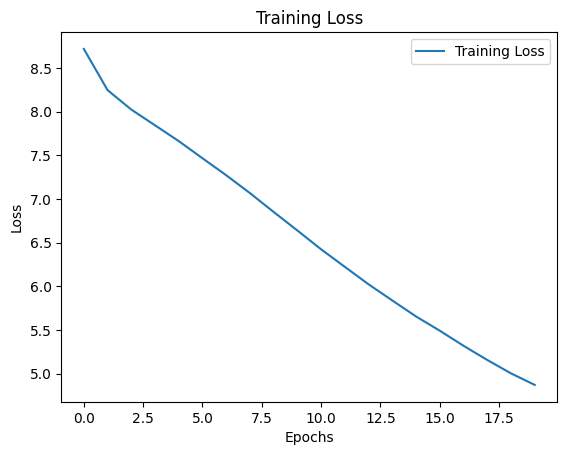

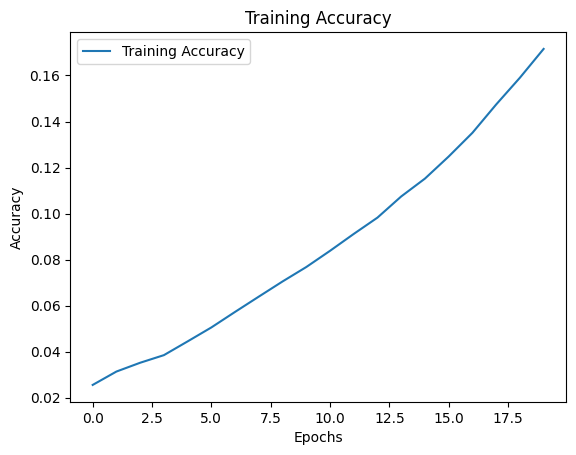

In [52]:
# Wykresy
import matplotlib.pyplot as plt

# Training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Pomysły na dalszy rozwój projektu:
# - rozszerzenie warstw modelu
# - zwiększenie wartości 'units' w warstwach LSTM
# - zwiększenie liczby epok (do co najmniej 50)
# - przetestowanie innych funkcji aktywacji oraz optimizerów
# - spróbowanie zaniechania warstwy Embedding